## Module Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Data Import

In [2]:
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

In [3]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Data Cleaning & Imputing

In [4]:
df_test.shape

(878, 80)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

<AxesSubplot:>

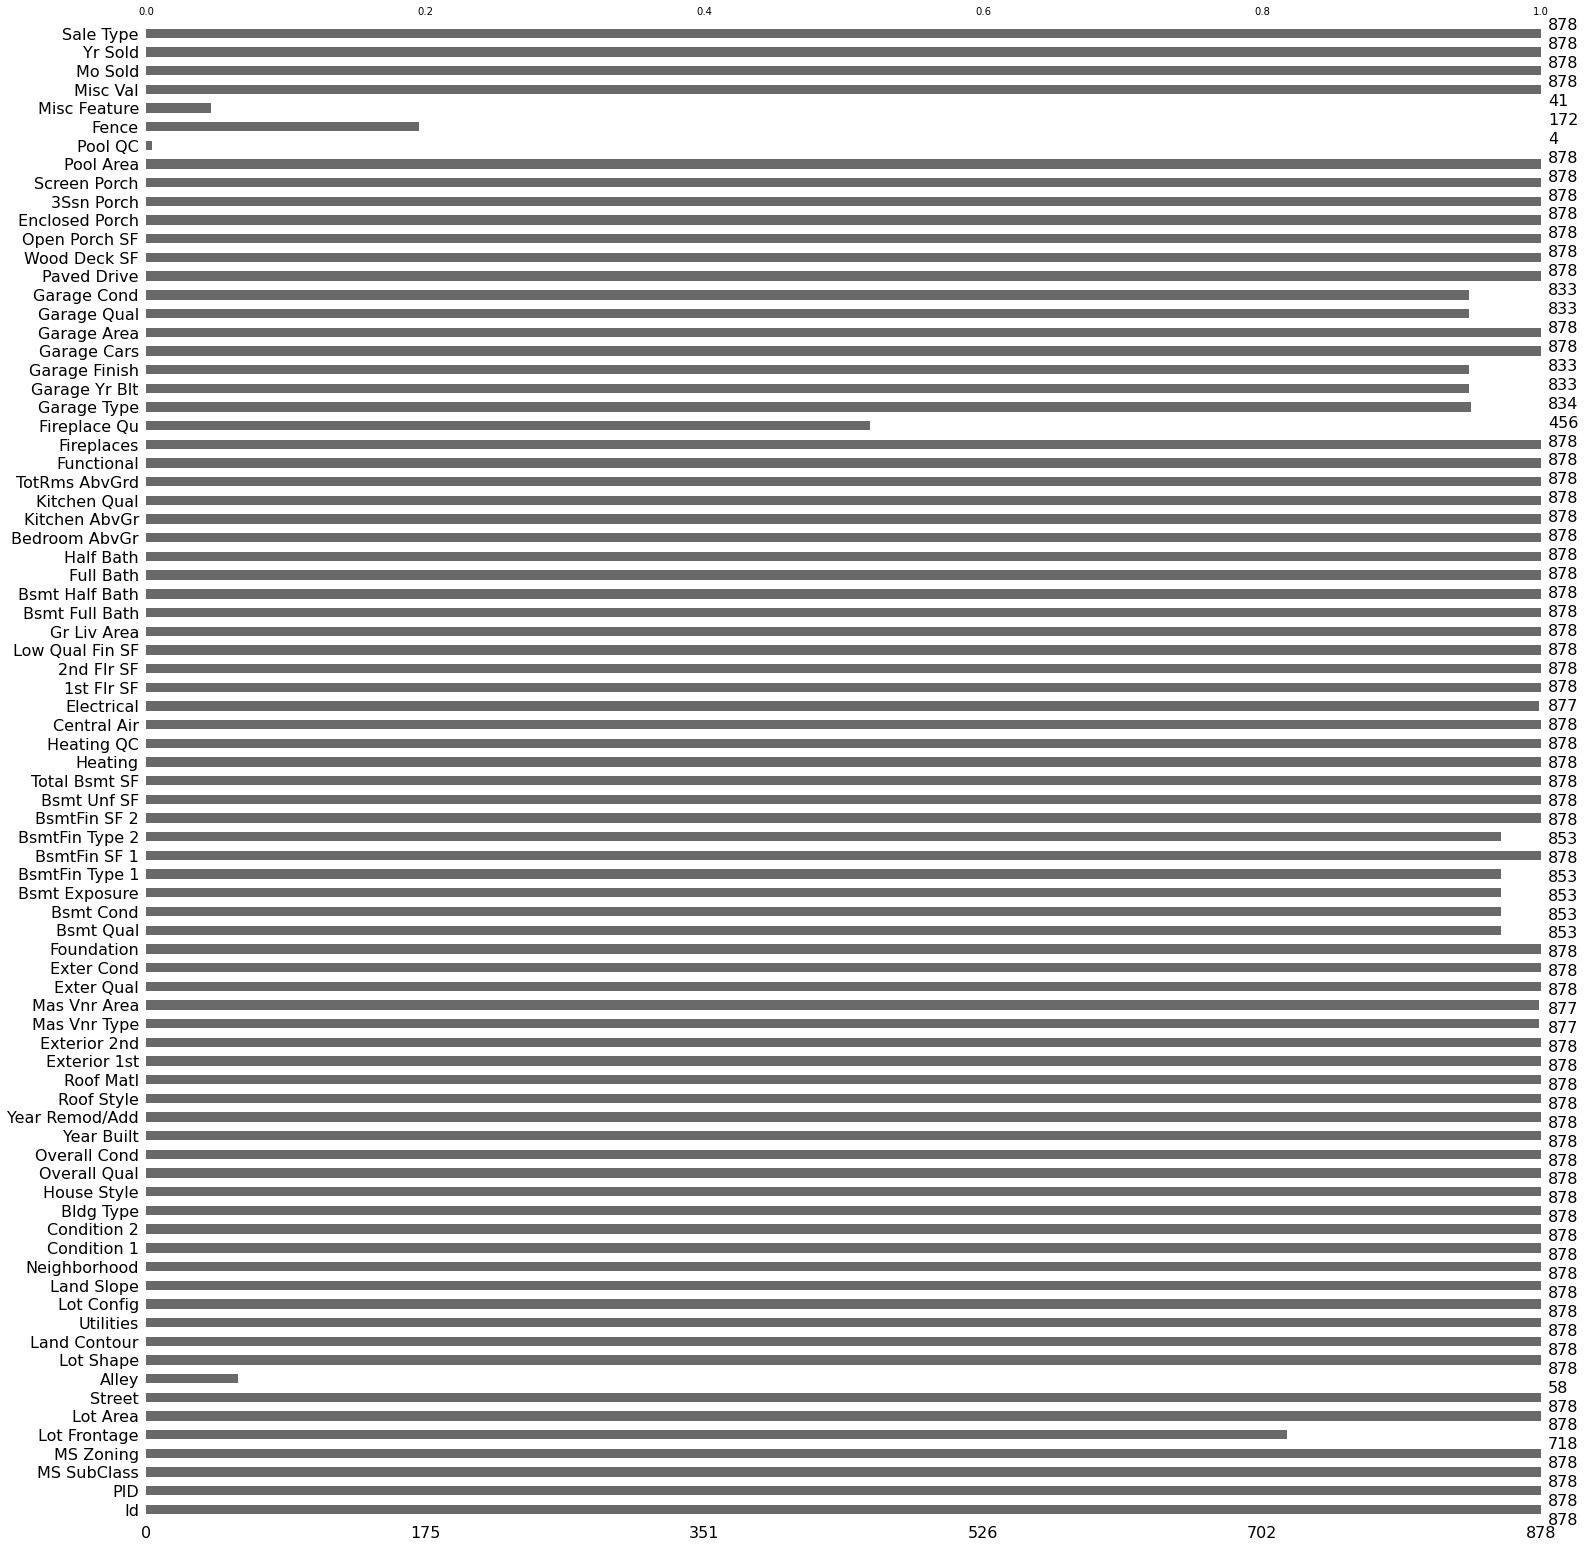

In [6]:
msno.bar(df_test)

Dropping columns that have more than 50% rows missing. It will not be possible to impoute these missing values. 

In [7]:
df_test.drop(['Misc Feature','Fence','Pool QC','Fireplace Qu','Alley'],axis=1,inplace=True)

In [8]:
df_null = pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False).values,df_test.isnull().sum().sort_values(ascending=False).index,columns=['Null Values'])

In [9]:
df_null

,Null Values
Lot Frontage,160
Garage Cond,45
Garage Yr Blt,45
Garage Finish,45
Garage Qual,45
...,...
BsmtFin SF 2,0
PID,0
Total Bsmt SF,0
Heating,0


In [10]:
null_columns = df_null[df_null['Null Values']!= 0].index
null_columns

Index(['Lot Frontage', 'Garage Cond', 'Garage Yr Blt', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Bsmt Qual', 'BsmtFin Type 2',
       'BsmtFin Type 1', 'Bsmt Exposure', 'Bsmt Cond', 'Mas Vnr Area',
       'Electrical', 'Mas Vnr Type'],
      dtype='object')

In [11]:
df_test[null_columns].dtypes

Lot Frontage      float64
Garage Cond        object
Garage Yr Blt     float64
Garage Finish      object
Garage Qual        object
Garage Type        object
Bsmt Qual          object
BsmtFin Type 2     object
BsmtFin Type 1     object
Bsmt Exposure      object
Bsmt Cond          object
Mas Vnr Area      float64
Electrical         object
Mas Vnr Type       object
dtype: object

In [12]:
lot_columns = [columns for columns in df_train.columns if 'Lot' in columns]
lot_columns

['Lot Frontage', 'Lot Area', 'Lot Shape', 'Lot Config']

In [13]:
df_test[df_test['Lot Frontage'].isnull()][lot_columns]

,Lot Frontage,Lot Area,Lot Shape,Lot Config
1,NaN,9662,IR1,Inside
4,NaN,9500,IR1,Inside
7,NaN,9286,IR1,CulDSac
13,NaN,7976,Reg,Inside
20,NaN,8246,IR1,Inside
...,...,...,...,...
853,NaN,7032,IR1,Corner
859,NaN,8780,IR1,Corner
866,NaN,7777,IR1,Inside
867,NaN,5062,IR1,CulDSac


The rows that have missing Lot Frontage values, do not have other related columns blank. Hence, the missing values must be imuted using median. Median is not as much affected by outliers as the mean. 

In [14]:
df_test['Lot Frontage'].fillna(df_test['Lot Frontage'].median(),inplace=True)

In [15]:
garage_columns = [columns for columns in df_train.columns if 'Garage' in columns]
garage_columns

['Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

In [16]:
df_test[df_test['Garage Yr Blt'].isnull()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
29,NaN,NaN,NaN,0,0,NaN,NaN
45,NaN,NaN,NaN,0,0,NaN,NaN
66,NaN,NaN,NaN,0,0,NaN,NaN
68,NaN,NaN,NaN,0,0,NaN,NaN
105,NaN,NaN,NaN,0,0,NaN,NaN
109,NaN,NaN,NaN,0,0,NaN,NaN
113,NaN,NaN,NaN,0,0,NaN,NaN
144,NaN,NaN,NaN,0,0,NaN,NaN
152,NaN,NaN,NaN,0,0,NaN,NaN
156,NaN,NaN,NaN,0,0,NaN,NaN


For the 114 rows where Garage Year Built is missing, related categorical information suggests that these houses do not have a garage. Hence, the missing values for these rows should be replaced by 0.

In [17]:
df_test['Garage Yr Blt'].fillna(0,inplace=True)

For categorical Garage data, rows with missing information implies No Garage. Hence, the missing values for these rows should be replaced by 'NoG', which implies No Garage. 

In [18]:
for column in df_test.select_dtypes(include=['object']).columns:
    if 'Garage' in column:
        df_test[column].fillna('NoG',inplace=True)

Based on the data dictionary, NA for basement columns means No Basement. Replacing missing categorical data with 'NoB' which means no basement.

In [19]:
for column in df_test.select_dtypes(include=['object']).columns:
    if 'Bsmt' in column:
        df_test[column].fillna('NoB',inplace=True)

In [20]:
df_test[df_test['Mas Vnr Area'].isnull()][['Mas Vnr Area','Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
865,NaN,NaN


In [21]:
df_test[df_test['Mas Vnr Type'].isnull()][['Mas Vnr Area','Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
865,NaN,NaN


In [22]:
df_test['Mas Vnr Area'].fillna(df_test['Mas Vnr Area'].median(),inplace=True)

In [23]:
df_test['Mas Vnr Type'].fillna(df_test['Mas Vnr Type'].mode()[0],inplace=True)

In [24]:
df_test['Electrical'].isnull().sum()

1

In [25]:
df_test['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [26]:
df_test['Electrical'].fillna(df_test['Electrical'].mode()[0],inplace=True)

In [27]:
df_test.isnull().sum().sort_values(ascending=False)

Id               0
Fireplaces       0
TotRms AbvGrd    0
Kitchen Qual     0
Kitchen AbvGr    0
                ..
Exterior 2nd     0
Exterior 1st     0
Roof Matl        0
Roof Style       0
Sale Type        0
Length: 75, dtype: int64

In [28]:
df_test['Lot Area'].sort_values(ascending=False)

213    215245
306    164660
522     56600
715     45600
869     36500
        ...  
536      1526
857      1526
231      1491
460      1488
542      1477
Name: Lot Area, Length: 878, dtype: int64

<AxesSubplot:xlabel='Lot Area'>

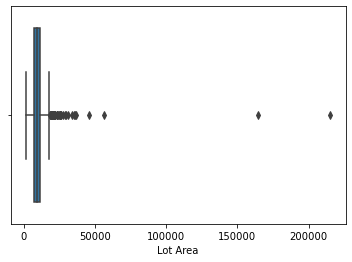

In [29]:
sns.boxplot(x=df_test['Lot Area'])

Two Outliers. 

In [30]:
df_test[df_test['Lot Area'] == 215245]['Neighborhood']

213    Timber
Name: Neighborhood, dtype: object

In [31]:
df_test[df_test['Lot Area'] == 164660]['Neighborhood']

306    Timber
Name: Neighborhood, dtype: object

In [32]:
df_test.groupby('Neighborhood').median()['Lot Area']

Neighborhood
Blmngtn     3192.5
Blueste     1806.0
BrDale      1890.0
BrkSide     6120.0
ClearCr    15584.0
CollgCr     9375.0
Crawfor    10582.0
Edwards     9367.5
Gilbert    10784.0
Greens      3782.0
IDOTRR      7731.5
MeadowV     1890.0
Mitchel    10621.0
NAmes       9500.0
NPkVill     2294.0
NWAmes     10709.0
NoRidge    11787.0
NridgHt    11961.5
OldTown     7613.0
SWISU       8145.0
Sawyer      9050.0
SawyerW     9304.0
Somerst     8555.0
StoneBr     8147.0
Timber     13028.5
Veenker    14694.0
Name: Lot Area, dtype: float64

Replacing the two outliers with the median for Lot Area for that neighborhood = 13028.

In [33]:
df_test.loc[213, 'Lot Area'] = 13028

In [34]:
df_test.loc[306, 'Lot Area'] = 13028

In [35]:
df_test.to_csv('../datasets/complete_clean_test.csv',index=False)